# Reasons for intensity anomaly

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
from matplotlib import colors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from cmocean import cm as cmo
from cmcrameri import cm as scm
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection

In [49]:
popts = [55, 35_000, 0.01, 180]  # simplified optimal values

def intensity_model(distance, load, a=55, b=35_000, l0=0.01, d0=180):
    return a/(load + 0.01) + b/(distance + d0)

In [50]:
flights = pd.read_csv("../data/by_route_airline.csv")
flights

,departure,arrival,arrival_longitude,arrival_latitude,departure_longitude,departure_latitude,airlinename,aircraft_types,avg_distance,flown_distance,gcd,flights,passengers,seats,rpk,average_load,co2,gco2_pax_km
0,SGN,HAN,105.806999,21.221201,106.652000,10.818800,Vietnam Airlines,5,1261.547796,1.154569e+07,1.063049e+07,9152,1.993998e+06,2447017,2.515524e+09,0.814869,191365.676340,76.073891
1,HAN,SGN,106.652000,10.818800,105.806999,21.221201,Vietnam Airlines,5,1261.547796,1.092879e+07,1.006249e+07,8663,1.966054e+06,2412725,2.480272e+09,0.814869,195266.817616,78.727996
2,CJU,GMP,126.791000,37.558300,126.492546,33.512058,Asiana Airlines,5,501.253150,5.223058e+06,4.702058e+06,10420,1.782774e+06,2123733,8.936213e+08,0.839453,100145.929946,112.067534
3,GMP,CJU,126.492546,33.512058,126.791000,37.558300,Asiana Airlines,5,501.253150,5.105765e+06,4.596465e+06,10186,1.719632e+06,2048514,8.619707e+08,0.839453,96146.969851,111.543198
4,FUK,HND,139.779999,35.552299,130.451004,33.585899,All Nippon Airways,9,982.357327,8.414873e+06,7.558273e+06,8566,1.708145e+06,2438270,1.678008e+09,0.700556,161111.234068,96.013360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81839,OSL,BOO,14.365300,67.269203,11.100400,60.193901,Wideroe's Flyveselskap,1,903.632067,9.036321e+02,8.036321e+02,1,2.521278e+01,39,2.278307e+04,0.646481,3.184374,139.769276
81840,DRW,TCA,134.182999,-19.634399,130.881851,-12.414970,Airnorth Regional,1,977.769135,9.777691e+02,8.777691e+02,1,2.355192e+01,30,2.302834e+04,0.785064,3.052329,132.546626
81841,TCA,DRW,130.881851,-12.414970,134.182999,-19.634399,Airnorth Regional,1,977.769135,9.777691e+02,8.777691e+02,1,2.355192e+01,30,2.302834e+04,0.785064,3.052329,132.546626
81842,TJN,PPT,-149.606995,-17.553699,-142.266464,-15.857434,Air Tahiti,1,905.066029,9.050660e+02,8.050660e+02,1,2.111117e+01,30,1.910700e+04,0.703706,2.493229,130.487717


In [51]:
intensity = np.array(flights["gco2_pax_km"])
load = np.array(flights["average_load"])
distance = np.array(flights["avg_distance"])

intensity_modelled = intensity_model(distance, load)
error = intensity_modelled - intensity

In [77]:
# base_load = np.median(load)
base_load = 0.8

# base_distance = np.median(distance)
base_distance = 1500

In [78]:
intensity_base_load = intensity_model(distance, base_load)
intensity_base_distance = intensity_model(base_distance, load)

In [79]:
anomaly_load = intensity - intensity_base_load
anomaly_distance = intensity - intensity_base_distance

In [80]:
valid_load = np.abs(anomaly_load) > np.abs(error)
valid_distance = np.abs(anomaly_distance) > np.abs(error)

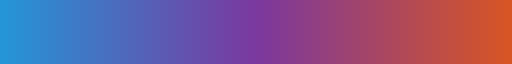

In [103]:
c1 = np.array([0.147, 0.586, 0.845, 1.0])
c2 = np.array([0.484, 0.222, 0.624, 1.0])
c3 = np.array([0.845, 0.335, 0.147, 1.0])

new_cmap = LinearSegmentedColormap.from_list('three_colors', (c1, c2, c3), N=64)
new_cmap

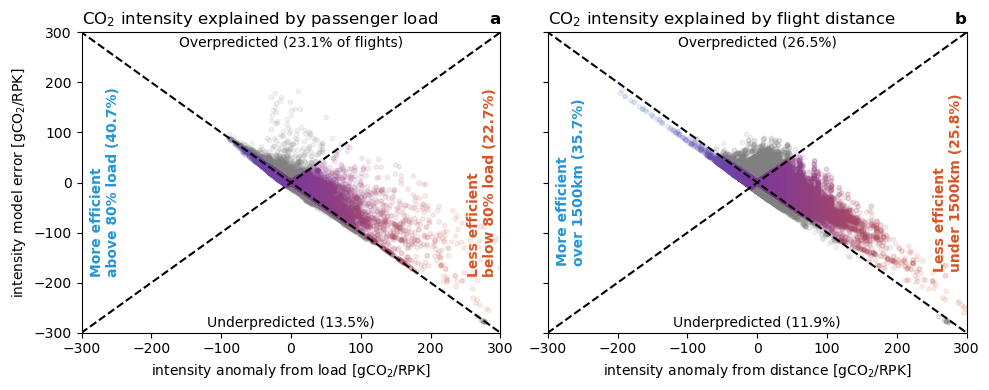

In [144]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

ax1.scatter(anomaly_load[~valid_load], error[~valid_load], 10, color="grey", alpha=0.1)
ax2.scatter(anomaly_distance[~valid_distance], error[~valid_distance], 10, color="grey", alpha=0.1)

ax1.scatter(anomaly_load[valid_load], error[valid_load], 10, anomaly_load[valid_load], cmap=new_cmap, vmin=xmin, vmax=xmax, alpha=0.1)
ax2.scatter(anomaly_distance[valid_distance], error[valid_distance], 10, anomaly_distance[valid_distance], cmap=new_cmap, vmin=xmin, vmax=xmax, alpha=0.1)

xmin, xmax = -300, 300
ymin, ymax = -300, 300

m = 500
ax1.plot([-m, m], [-m, m], "k--")
ax2.plot([-m, m], [-m, m], "k--")

ax2.plot([-m, m], [m, -m], "k--")
ax1.plot([-m, m], [m, -m], "k--")

ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)
ax2.set_xlim(xmin, xmax)

ax1.set_xlabel("intensity anomaly from load [gCO$_2$/RPK]")
ax2.set_xlabel("intensity anomaly from distance [gCO$_2$/RPK]")
ax1.set_ylabel("intensity model error [gCO$_2$/RPK]")

n = len(flights)
p = sum((~valid_load)[error >= 0])/n*100
ax1.text(0.5, 0.95, "Overpredicted ({:.1f}% of flights)".format(p), transform=ax1.transAxes, horizontalalignment="center")
p = sum((~valid_load)[error < 0])/n*100
ax1.text(0.5, 0.02, "Underpredicted ({:.1f}%)".format(p), transform=ax1.transAxes, horizontalalignment="center")

p = sum((~valid_distance)[error >= 0])/n*100
ax2.text(0.5, 0.95, "Overpredicted ({:.1f}%)".format(p), transform=ax2.transAxes, horizontalalignment="center")
p = sum((~valid_distance)[error < 0])/n*100
ax2.text(0.5, 0.02, "Underpredicted ({:.1f}%)".format(p), transform=ax2.transAxes, horizontalalignment="center")

p = sum((valid_load)[anomaly_load >= 0])/n*100
ax1.text(0.92, 0.5, "Less efficient\nbelow 80% load ({:.1f}%)".format(p), transform=ax1.transAxes, color=c3, fontweight="bold", rotation=90, verticalalignment="center")
p = sum((valid_load)[anomaly_load < 0])/n*100
ax1.text(0.02, 0.5, "More efficient\nabove 80% load ({:.1f}%)".format(p), transform=ax1.transAxes, color=c1, fontweight="bold", rotation=90, verticalalignment="center")

p = sum((valid_distance)[anomaly_distance >= 0])/n*100
ax2.text(0.92, 0.5, "Less efficient\nunder 1500km ({:.1f}%)".format(p), transform=ax2.transAxes, color=c3, fontweight="bold", rotation=90, verticalalignment="center")
p = sum((valid_distance)[anomaly_distance < 0])/n*100
ax2.text(0.02, 0.5, "More efficient\nover 1500km ({:.1f}%)".format(p), transform=ax2.transAxes, color=c1, fontweight="bold", rotation=90, verticalalignment="center")

ax1.set_title("CO$_2$ intensity explained by passenger load", loc="left")
ax2.set_title("CO$_2$ intensity explained by flight distance", loc="left")

ax1.set_title("a", loc="right", fontweight="bold")
ax2.set_title("b", loc="right", fontweight="bold")

plt.tight_layout()
plt.show()

In [ ]:
Figure S1: CO2 intensity per flight explained by passenger load factor or flight distance. Anomaly of the modelled CO2 intensity compared to data. 

In [145]:
n

81844